# Neural Net model
This Neural Net model predicts superconductor critical temperatures. The first model uses default parameters

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
superconductor_df = pd.read_csv('../datasets/train.csv')

superconductor_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
superconductor_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [4]:
superconductor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

## Regression part 1
#### Create the regression model

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [7]:
#set up X and y
X = superconductor_df.drop(columns=['critical_temp'])
y = superconductor_df['critical_temp'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [8]:
#instantiate scaler and scale data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(32, input_dim = X_train_sc.shape[1], activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [41]:
history = model.fit(X_train_sc, y_train, epochs = 250, batch_size = 16, verbose = 2, validation_split = 0.2)

Epoch 1/250
745/745 - 1s - loss: 115.9251 - mse: 115.9251 - mae: 7.0618 - val_loss: 136.1500 - val_mse: 136.1500 - val_mae: 7.8615
Epoch 2/250
745/745 - 1s - loss: 115.3444 - mse: 115.3444 - mae: 7.0530 - val_loss: 141.7504 - val_mse: 141.7504 - val_mae: 7.6063
Epoch 3/250
745/745 - 1s - loss: 115.2197 - mse: 115.2197 - mae: 7.0400 - val_loss: 137.1133 - val_mse: 137.1133 - val_mae: 7.5637
Epoch 4/250
745/745 - 1s - loss: 116.2476 - mse: 116.2476 - mae: 7.0643 - val_loss: 130.6195 - val_mse: 130.6195 - val_mae: 7.4996
Epoch 5/250
745/745 - 1s - loss: 114.7339 - mse: 114.7339 - mae: 7.0187 - val_loss: 134.6736 - val_mse: 134.6736 - val_mae: 7.4763
Epoch 6/250
745/745 - 1s - loss: 115.5403 - mse: 115.5403 - mae: 7.0773 - val_loss: 142.2337 - val_mse: 142.2337 - val_mae: 8.0948
Epoch 7/250
745/745 - 1s - loss: 114.7412 - mse: 114.7412 - mae: 7.0439 - val_loss: 147.6324 - val_mse: 147.6324 - val_mae: 7.6136
Epoch 8/250
745/745 - 1s - loss: 114.4389 - mse: 114.4389 - mae: 7.0354 - val_loss:

In [42]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


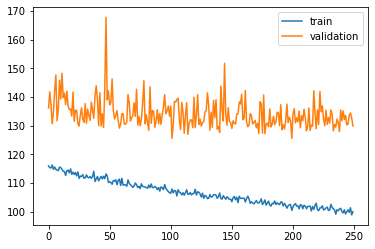

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'validation'])

In [44]:
y_preds = model.predict(X_test_sc)

In [45]:
y_preds.shape

(6379, 1)

In [46]:
y_test.shape

(6379,)

In [50]:
type(y_preds)

numpy.ndarray

In [51]:
type(y_test)

numpy.ndarray

In [47]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_preds))
mae = metrics.mean_absolute_error(y_test,y_preds)
mape = metrics.mean_absolute_percentage_error(y_test,y_preds)
ex_var = metrics.explained_variance_score(y_test,y_preds)
r2_score = metrics.r2_score(y_test,y_preds)

In [48]:
print(f"Root Mean Squared Error:	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")

Root Mean Squared Error:	11.55 Kelvins
Mean Absolute Error:		7.2 Kelvins
Mean Abs. Percent Error:	6.71%
Explained Variance Score:	0.8845
R2 Score:			0.8842


### Principal Component Analysis
##### (still part 1)

Let's reduce the number of dimensions and see what effect it has on the results

In [56]:
from sklearn.decomposition import PCA

In [57]:
#instantiate PCA with enough dimensions to capture 95% of explained variance
pca = PCA(0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [58]:
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print(f"The number of features is reduced from {X_train_sc.shape[1]} to {X_train_pca.shape[1]}")

The number of features is reduced from 81 to 17


In [62]:
X_train_pca.shape

(14884, 17)

In [64]:
model = Sequential()

model.add(Dense(32, input_dim = X_train_pca.shape[1], activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [66]:
history = model.fit(X_train_pca, y_train, epochs = 250, batch_size = 16, verbose = 2, validation_split = 0.2)

Epoch 1/250
745/745 - 1s - loss: 704.6340 - mse: 704.6340 - mae: 17.6300 - val_loss: 336.0803 - val_mse: 336.0803 - val_mae: 13.3411
Epoch 2/250
745/745 - 1s - loss: 326.0791 - mse: 326.0791 - mae: 12.8393 - val_loss: 300.5837 - val_mse: 300.5837 - val_mae: 12.2428
Epoch 3/250
745/745 - 1s - loss: 297.0361 - mse: 297.0361 - mae: 12.0070 - val_loss: 278.7152 - val_mse: 278.7152 - val_mae: 11.6757
Epoch 4/250
745/745 - 1s - loss: 279.6574 - mse: 279.6574 - mae: 11.5048 - val_loss: 266.8719 - val_mse: 266.8719 - val_mae: 11.3392
Epoch 5/250
745/745 - 1s - loss: 268.4810 - mse: 268.4810 - mae: 11.1937 - val_loss: 266.4774 - val_mse: 266.4774 - val_mae: 11.3776
Epoch 6/250
745/745 - 1s - loss: 261.0764 - mse: 261.0764 - mae: 10.9924 - val_loss: 256.9066 - val_mse: 256.9066 - val_mae: 10.9036
Epoch 7/250
745/745 - 1s - loss: 255.0618 - mse: 255.0618 - mae: 10.8439 - val_loss: 251.4913 - val_mse: 251.4913 - val_mae: 10.8035
Epoch 8/250
745/745 - 1s - loss: 251.3345 - mse: 251.3345 - mae: 10.7

In [67]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


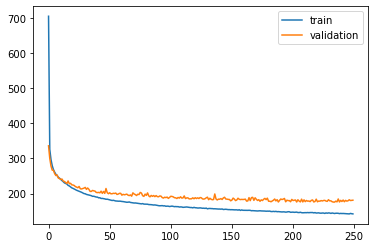

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'validation'])

In [72]:
#make predictions
pca_preds = model.predict(X_test_pca)

In [73]:
#scoring metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pca_preds))
mae = metrics.mean_absolute_error(y_test,pca_preds)
mape = metrics.mean_absolute_percentage_error(y_test,pca_preds)
ex_var = metrics.explained_variance_score(y_test,pca_preds)
r2_score = metrics.r2_score(y_test,pca_preds)

In [74]:
print("\nUpdated scoring metrics with reduced dimensions:\n")
print(f"Root Mean Squared Error: 	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")



Updated scoring metrics with reduced dimensions:

Root Mean Squared Error: 	13.09 Kelvins
Mean Absolute Error:		8.47 Kelvins
Mean Abs. Percent Error:	7.59%
Explained Variance Score:	0.8523
R2 Score:			0.8511


## Regression part 2
#### Elements dataset
Now we run identical experiments on the next dataset, which gives us the detailed element-by-element makeup of every superconductor at the atomic level.  This dataset has a 1-to-1 correspondence with the prior dataset, and in theory they could be merged into one mega-DataFrame

In [76]:
elements_df = pd.read_csv('../datasets/unique_m.csv')

elements_df.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [77]:
elements_df.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [78]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

In [79]:
#notice we're dropping TWO columns from X

X = elements_df.drop(columns=['critical_temp','material'])
y = elements_df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [82]:
#instantiate scaler and scale data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [83]:
model = Sequential()

model.add(Dense(32, input_dim = X_train_sc.shape[1], activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                2784      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [85]:
history = model.fit(X_train_sc, y_train, epochs = 250, batch_size = 16, verbose = 2, validation_split = 0.2)

Epoch 1/250
745/745 - 1s - loss: 789.2092 - mse: 789.2092 - mae: 18.1118 - val_loss: 433.5536 - val_mse: 433.5536 - val_mae: 14.7176
Epoch 2/250
745/745 - 1s - loss: 395.0325 - mse: 395.0325 - mae: 13.4556 - val_loss: 364.4608 - val_mse: 364.4608 - val_mae: 13.2907
Epoch 3/250
745/745 - 1s - loss: 324.2941 - mse: 324.2941 - mae: 12.3559 - val_loss: 310.2792 - val_mse: 310.2792 - val_mae: 12.2330
Epoch 4/250
745/745 - 1s - loss: 274.4466 - mse: 274.4466 - mae: 11.3932 - val_loss: 270.6771 - val_mse: 270.6771 - val_mae: 11.5058
Epoch 5/250
745/745 - 1s - loss: 244.3115 - mse: 244.3115 - mae: 10.7396 - val_loss: 253.6586 - val_mse: 253.6586 - val_mae: 11.1130
Epoch 6/250
745/745 - 1s - loss: 226.8712 - mse: 226.8712 - mae: 10.3054 - val_loss: 238.4697 - val_mse: 238.4697 - val_mae: 10.6691
Epoch 7/250
745/745 - 1s - loss: 214.1754 - mse: 214.1754 - mae: 9.9839 - val_loss: 230.5312 - val_mse: 230.5312 - val_mae: 10.5401
Epoch 8/250
745/745 - 1s - loss: 206.7265 - mse: 206.7265 - mae: 9.770

In [86]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


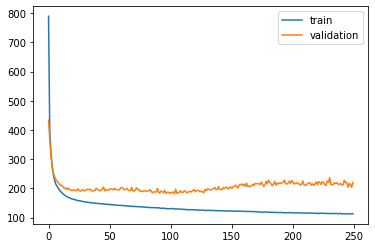

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'validation'])

In [88]:
y_preds = model.predict(X_test_sc)

In [89]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_preds))
mae = metrics.mean_absolute_error(y_test,y_preds)
mape = metrics.mean_absolute_percentage_error(y_test,y_preds)
ex_var = metrics.explained_variance_score(y_test,y_preds)
r2_score = metrics.r2_score(y_test,y_preds)

In [90]:
print(f"Root Mean Squared Error:	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")

Root Mean Squared Error:	23.01 Kelvins
Mean Absolute Error:		8.57 Kelvins
Mean Abs. Percent Error:	6.44%
Explained Variance Score:	0.5536
R2 Score:			0.5536


### Principal Component Analysis
##### (still part 2)

Let's reduce the number of dimensions and see what effect it has on the results

In [92]:
#instantiate PCA with enough dimensions to capture 95% of explained variance
pca = PCA(0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [93]:
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print(f"The number of features is reduced from {X_train_sc.shape[1]} to {X_train_pca.shape[1]}")

The number of features is reduced from 86 to 65


In [94]:
model = Sequential()

model.add(Dense(32, input_dim = X_train_pca.shape[1], activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [96]:
history = model.fit(X_train_pca, y_train, epochs = 250, batch_size = 16, verbose = 2, validation_split = 0.2)

Epoch 1/250
745/745 - 2s - loss: 1073.8600 - mse: 1073.8600 - mae: 21.8428 - val_loss: 525.5934 - val_mse: 525.5934 - val_mae: 15.8225
Epoch 2/250
745/745 - 1s - loss: 478.6841 - mse: 478.6841 - mae: 15.0417 - val_loss: 458.6813 - val_mse: 458.6813 - val_mae: 15.0633
Epoch 3/250
745/745 - 1s - loss: 411.6725 - mse: 411.6725 - mae: 14.0128 - val_loss: 407.0152 - val_mse: 407.0152 - val_mae: 14.2750
Epoch 4/250
745/745 - 1s - loss: 357.1116 - mse: 357.1116 - mae: 13.0963 - val_loss: 353.0217 - val_mse: 353.0217 - val_mae: 13.2888
Epoch 5/250
745/745 - 1s - loss: 312.4359 - mse: 312.4359 - mae: 12.4099 - val_loss: 322.5935 - val_mse: 322.5935 - val_mae: 12.6369
Epoch 6/250
745/745 - 1s - loss: 286.1377 - mse: 286.1377 - mae: 11.9612 - val_loss: 300.2783 - val_mse: 300.2783 - val_mae: 12.4806
Epoch 7/250
745/745 - 1s - loss: 269.1266 - mse: 269.1266 - mae: 11.5987 - val_loss: 284.4467 - val_mse: 284.4467 - val_mae: 12.0305
Epoch 8/250
745/745 - 1s - loss: 260.7072 - mse: 260.7072 - mae: 11

In [97]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


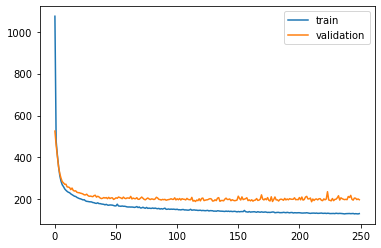

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'validation'])

In [99]:
#make predictions
pca_preds = model.predict(X_test_pca)

In [100]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,pca_preds))
mae = metrics.mean_absolute_error(y_test,pca_preds)
mape = metrics.mean_absolute_percentage_error(y_test,pca_preds)
ex_var = metrics.explained_variance_score(y_test,pca_preds)
r2_score = metrics.r2_score(y_test,pca_preds)

In [101]:
print("\nUpdated scoring metrics with reduced dimensions:\n")
print(f"Root Mean Squared Error: 	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")


Updated scoring metrics with reduced dimensions:

Root Mean Squared Error: 	18.71 Kelvins
Mean Absolute Error:		8.87 Kelvins
Mean Abs. Percent Error:	8.0%
Explained Variance Score:	0.7056
R2 Score:			0.7048
